In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
# !pip install tensorflow

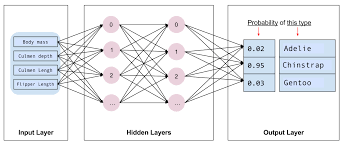

<img src='https://miro.medium.com/max/432/1*y0pXhfaTGmvfNwaGoHnW5w.jpeg'>

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/EnggQasim/NED_ML_batch3/main/class3/data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [57]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [59]:
X = df[['Height']].values
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [60]:
X[0]

array([73.84701702])

In [61]:
y_true = df[["Weight"]].values
y_true

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [62]:
print(X.shape)
print(y_true.shape)

(10000, 1)
(10000, 1)


In [63]:
X[0].shape

(1,)

# Create Nural Network 

In [64]:
print(X[0])
display(X[0].shape)

[73.84701702]


(1,)

In [39]:
df[["Gender","Height"]].values[0].shape

(2,)

In [65]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

## Model Summary

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Compilation Steps

In [68]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

#Split data train and test portion

In [69]:
X_train = X[:]
y_train = y_true[:]

X_test = X[:]
y_test = y_true[:]

In [70]:
print(len(X_train))
print(len(X_test))

10000
10000


# Now Starting Training

In [72]:
model.fit(X_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 1ms/step - loss: 199.4187
Epoch 2/100
79/79 [==============================] - 0s 1ms/step - loss: 178.4027
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 174.8312
Epoch 4/100
79/79 [==============================] - 0s 1ms/step - loss: 177.1709
Epoch 5/100
79/79 [==============================] - 0s 1ms/step - loss: 187.5254
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 177.5749
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 191.0830
Epoch 8/100
79/79 [==============================] - 0s 1ms/step - loss: 172.7659
Epoch 9/100
79/79 [==============================] - 0s 1ms/step - loss: 175.2161
Epoch 10/100
79/79 [==============================] - 0s 1ms/step - loss: 170.5560
Epoch 11/100
79/79 [==============================] - 0s 1ms/step - loss: 168.3511
Epoch 12/100
79/79 [==============================] - 0s 1ms/step - loss: 169.1367
Epoch 13/100


79/79 [==============================] - 0s 1ms/step - loss: 160.5435
Epoch 100/100
79/79 [==============================] - 0s 1ms/step - loss: 153.9566


# Test on unseen_data

In [73]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 935us/step - loss: 166.9328


166.93280029296875

# Prediction with model

In [74]:
y_pred = model.predict(X)
y_pred

313/313 [==============================] - 0s 807us/step


array([[223.77405],
       [184.40198],
       [225.81909],
       ...,
       [146.20514],
       [186.3634 ],
       [131.25146]], dtype=float32)

In [75]:
y_test

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

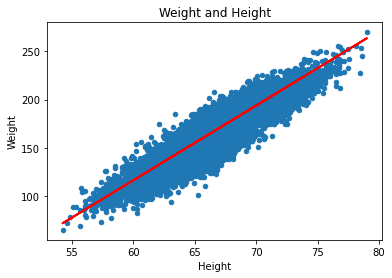

In [76]:
df.plot(kind='scatter',
        x="Height",
        y="Weight",
        title="Weight and Height")
plt.plot(X,y_pred, color='red', linewidth=2)

In [77]:
w, b = model.get_weights()

In [78]:
print(w)
print(b)

[[7.773196]]
[-350.2533]


In [79]:
model.predict([240])

1/1 [==============================] - 0s 51ms/step


array([[1515.3138]], dtype=float32)

1/1 [==============================] - 0s 37ms/step


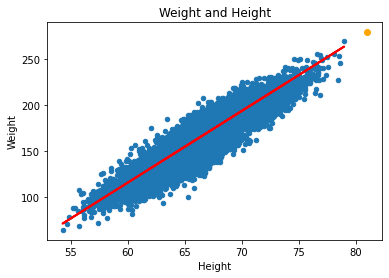

In [83]:
run_height = 81
df.plot(kind='scatter',
        x="Height",
        y="Weight",
        title="Weight and Height")
plt.plot(X,y_pred, color='red', linewidth=2)

plt.scatter(x=run_height,
            y=model.predict([run_height]),
            color='orange')

In [ ]:
import re
x  ="hello/wo\rld"

re.findall(r"[heo]*",x)